<a id='top'></a>

# 第1章 ウェブからの注文数を分析する10本ノック

In [1]:
# ライブラリのインポート
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

## 目次
---
[ノック1: データを読み込んでみよう](#1)  
[ノック2: データを結合(ユニオン)してみよう](#2)  
[ノック3: 売上データ同士を結合(ジョイン)してみよう](#3)  
[ノック4: マスターデータを結合(ジョイン)してみよう](#4)  
[ノック5: 必要なデータ列を作ろう](#5)  
[ノック6: データ検算をしよう](#6)  
[ノック7: 各種統計量を把握しよう](#7)  
[ノック8: 月別でデータを集計してみよう](#8)  
[ノック9: 月別、商品別でデータを集計してみよう](#9)  
[ノック10: 商品別の売上推移を可視化してみよう](#10)

<a id='1'></a>

## ノック1: データを読み込んでみよう

In [2]:
directory = "../data/サンプルコード_20201021/1章/"

customer_master = pd.read_csv(directory + "customer_master.csv")
display(customer_master.head())

item_master = pd.read_csv(directory + "item_master.csv")
display(item_master.head())

transaction_1 = pd.read_csv(directory + "transaction_1.csv")
transaction_2 = pd.read_csv(directory + "transaction_2.csv")
display(transaction_1.head())

transaction_detail_1 = pd.read_csv(directory + "transaction_detail_1.csv")
transaction_detail_2 = pd.read_csv(directory + "transaction_detail_2.csv")
display(transaction_detail_1.head())

,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [3]:
# 欠損確認
print(customer_master.isna().any(axis=1).sum())
print(item_master.isna().any(axis=1).sum())
print(transaction_1.isna().any(axis=1).sum())
print(transaction_2.isna().any(axis=1).sum())
print(transaction_detail_1.isna().any(axis=1).sum())
print(transaction_detail_2.isna().any(axis=1).sum())

0
0
0
0
0
0


<a id='2'></a>

## ノック2: データを結合(ユニオン)してみよう

In [4]:
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
display(transaction.head())

transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True)
display(transaction_detail.head())

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [5]:
# 確認
assert len(transaction) == len(transaction_1) + len(transaction_2)
assert len(transaction_detail) == len(transaction_detail_1) + len(transaction_detail_2)
print("complete union")

complete union


<a id='3'></a>

## ノック3: 売上データ同士を結合(ジョイン)してみよう

In [6]:
join_data = pd.merge(transaction_detail, transaction, how="left", on="transaction_id")
join_data

,detail_id,transaction_id,item_id,quantity,price,payment_date,customer_id
0,0,T0000000113,S005,1,210000,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,50000,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,120000,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,210000,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,180000,2019-07-31 21:20:44,HI400734
7140,7140,T0000006895,S002,1,85000,2019-07-31 21:52:48,AS339451
7141,7141,T0000006896,S001,2,100000,2019-07-31 23:35:25,OA027325
7142,7142,T0000006897,S002,1,85000,2019-07-31 23:39:35,TS624738


<a id='4'></a>

## ノック4: マスターデータを結合(ジョイン)してみよう

In [7]:
join_data = pd.merge(join_data, customer_master, how="left", on="customer_id")
join_data = pd.merge(join_data, item_master, how="left", on="item_id")
join_data

,detail_id,transaction_id,item_id,quantity,price,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,210000,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,50000,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,120000,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,210000,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,170000,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,180000,2019-07-31 21:20:44,HI400734,宍戸 明,2019-01-04 13:24:40,ししど あきら,shishido_akira@example.com,M,64,1955/1/13,福井県,PC-D,180000
7140,7140,T0000006895,S002,1,85000,2019-07-31 21:52:48,AS339451,相原 みき,2019-02-11 19:34:02,あいはら みき,aihara_miki@example.com,F,74,1945/2/3,北海道,PC-B,85000
7141,7141,T0000006896,S001,2,100000,2019-07-31 23:35:25,OA027325,松田 早紀,2019-04-17 09:23:50,まつだ さき,matsuda_saki@example.com,F,40,1979/5/25,福島県,PC-A,50000
7142,7142,T0000006897,S002,1,85000,2019-07-31 23:39:35,TS624738,進藤 正敏,2019-02-20 18:15:56,しんどう まさとし,shinndou_masatoshi@example.com,M,56,1963/2/21,東京都,PC-B,85000


In [8]:
# priceの整合性を確認
join_data.groupby("transaction_id").apply(lambda x: (x["item_price"] * x["quantity"]).sum() != x["price"].iloc[0]).sum()

0

In [9]:
# sort
join_data.sort_values(["transaction_id", "detail_id"], inplace=True, ignore_index=True)
join_data

,detail_id,transaction_id,item_id,quantity,price,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,210000,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,50000,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,120000,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,210000,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,170000,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,180000,2019-07-31 21:20:44,HI400734,宍戸 明,2019-01-04 13:24:40,ししど あきら,shishido_akira@example.com,M,64,1955/1/13,福井県,PC-D,180000
7140,7140,T0000006895,S002,1,85000,2019-07-31 21:52:48,AS339451,相原 みき,2019-02-11 19:34:02,あいはら みき,aihara_miki@example.com,F,74,1945/2/3,北海道,PC-B,85000
7141,7141,T0000006896,S001,2,100000,2019-07-31 23:35:25,OA027325,松田 早紀,2019-04-17 09:23:50,まつだ さき,matsuda_saki@example.com,F,40,1979/5/25,福島県,PC-A,50000
7142,7142,T0000006897,S002,1,85000,2019-07-31 23:39:35,TS624738,進藤 正敏,2019-02-20 18:15:56,しんどう まさとし,shinndou_masatoshi@example.com,M,56,1963/2/21,東京都,PC-B,85000


<a id='5'></a>

## ノック5: 必要なデータ列を作ろう

In [10]:
tmp = join_data["price"]
join_data["price"] = join_data["item_price"] * join_data["quantity"]
join_data

,detail_id,transaction_id,item_id,quantity,price,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,210000,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,50000,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,120000,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,210000,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,170000,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,180000,2019-07-31 21:20:44,HI400734,宍戸 明,2019-01-04 13:24:40,ししど あきら,shishido_akira@example.com,M,64,1955/1/13,福井県,PC-D,180000
7140,7140,T0000006895,S002,1,85000,2019-07-31 21:52:48,AS339451,相原 みき,2019-02-11 19:34:02,あいはら みき,aihara_miki@example.com,F,74,1945/2/3,北海道,PC-B,85000
7141,7141,T0000006896,S001,2,100000,2019-07-31 23:35:25,OA027325,松田 早紀,2019-04-17 09:23:50,まつだ さき,matsuda_saki@example.com,F,40,1979/5/25,福島県,PC-A,50000
7142,7142,T0000006897,S002,1,85000,2019-07-31 23:39:35,TS624738,進藤 正敏,2019-02-20 18:15:56,しんどう まさとし,shinndou_masatoshi@example.com,M,56,1963/2/21,東京都,PC-B,85000


<a id='6'></a>

## ノック6: データ検算をしよう

In [11]:
(join_data["price"] == tmp).all()
# 一つのtransactionに複数種類の商品があったらこれはFalseになるような...

True

<a id='7'></a>

## ノック7: 各種統計量を把握しよう

In [12]:
# 欠損数
join_data.isna().sum()

detail_id             0
transaction_id        0
item_id               0
quantity              0
price                 0
payment_date          0
customer_id           0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
item_name             0
item_price            0
dtype: int64

In [13]:
# describe
join_data.describe(include="all")

,detail_id,transaction_id,item_id,quantity,price,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
count,7144.000000,7144,7144,7144.000000,7144.000000,7144,7144,7144,7144,7144,7144,7144,7144.000000,7144,7144,7144,7144.000000
unique,NaN,6786,5,NaN,NaN,6785,3018,2998,3018,2988,3018,2,NaN,2809,47,5,NaN
top,NaN,T0000000790,S001,NaN,NaN,2019-02-18 15:11:38,AS237205,角田 美月,2019-01-19 15:53:42,かどた みづき,kadota_miduki@example.com,M,NaN,1947/6/17,東京都,PC-A,NaN
freq,NaN,4,2143,NaN,NaN,4,13,13,13,13,13,3596,NaN,13,727,2143,NaN
mean,3571.500000,NaN,NaN,1.199888,135937.150056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.265677,NaN,NaN,NaN,121698.628219
std,2062.439494,NaN,NaN,0.513647,68511.453297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.190314,NaN,NaN,NaN,64571.311830
min,0.000000,NaN,NaN,1.000000,50000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,50000.000000
25%,1785.750000,NaN,NaN,1.000000,85000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.000000,NaN,NaN,NaN,50000.000000
50%,3571.500000,NaN,NaN,1.000000,120000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,102500.000000
75%,5357.250000,NaN,NaN,1.000000,210000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.000000,NaN,NaN,NaN,187500.000000


In [14]:
# データ期間
join_data["payment_date"].min(), join_data["payment_date"].max()

('2019-02-01 01:36:57', '2019-07-31 23:41:38')

<a id='8'></a>

## ノック8: 月別でデータを集計してみよう

In [15]:
# データ型
join_data.dtypes

detail_id              int64
transaction_id        object
item_id               object
quantity               int64
price                  int64
payment_date          object
customer_id           object
customer_name         object
registration_date     object
customer_name_kana    object
email                 object
gender                object
age                    int64
birth                 object
pref                  object
item_name             object
item_price             int64
dtype: object

In [16]:
# payment_dateを日付型に変換
join_data["payment_date"] = pd.to_datetime(join_data["payment_date"])
join_data["payment_month"] = join_data["payment_date"].dt.strftime("%Y-%m")
join_data.head()[["payment_date", "payment_month"]]

,payment_date,payment_month
0,2019-02-01 01:36:57,2019-02
1,2019-02-01 01:37:23,2019-02
2,2019-02-01 02:34:19,2019-02
3,2019-02-01 02:47:23,2019-02
4,2019-02-01 04:33:46,2019-02


In [17]:
# 年月別の売上
join_data.groupby("payment_month")["price"].sum()

payment_month
2019-02    160185000
2019-03    160370000
2019-04    160510000
2019-05    155420000
2019-06    164030000
2019-07    170620000
Name: price, dtype: int64

<a id='9'></a>

## ノック9: 月別、商品別でデータを集計してみよう

In [18]:
join_data.groupby(["payment_month", "item_name"])[["price", "quantity"]].sum()

price  quantity
payment_month item_name                    
2019-02       PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
2019-03       PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
2019-04       PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
2019-05       PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
2019-06       PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
2019-07       PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [19]:
# pivot table
pd.pivot_table(join_data, ["price", "quantity"], "item_name", "payment_month", "sum")
# join_data.groupby(["payment_month", "item_name"])[["price", "quantity"]].sum().unstack(level=0)

price                                                    \
payment_month   2019-02   2019-03   2019-04   2019-05   2019-06   2019-07   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                          
payment_month  2019-02 2019-03 2019-04 2019-05 2019-06 2019-07  
item_name                                                       
PC-A               483     520     518     497     520     505  
PC-B               297     300     276     298     282     332  
PC-C               165     159     183     171     182     162  
PC-D               173     143     135     144     160     145  
PC-E               285     305     309     280     302     341

<a id='10'></a>

## ノック10: 商品別の売上推移を可視化してみよう

In [20]:
class FixedOrderFormatter(ScalarFormatter):
    """グラフの桁調整用"""
    
    def __init__(self, order_of_mag=0, useOffset=True, useMathText=True):
        """
        コンストラクタ
        
        Args:
            order_of_mag(int): 1目盛当たりの値
            useOffset(bool): 指数表記を使用するか否か（ScalarFormatterに準拠）
            useMathText(bool) べき乗表記を使用するか否か（ScalarFormatterに準拠）
        """
        
        self._order_of_mag = order_of_mag
        super().__init__(useOffset=useOffset, useMathText=useMathText)
    
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self._order_of_mag

In [21]:
# 描画データ
graph_data = join_data.groupby(["payment_month", "item_name"])["price"].sum().unstack()
graph_data

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
2019-02,24150000,25245000,19800000,31140000,59850000
2019-03,26000000,25500000,19080000,25740000,64050000
2019-04,25900000,23460000,21960000,24300000,64890000
2019-05,24850000,25330000,20520000,25920000,58800000
2019-06,26000000,23970000,21840000,28800000,63420000
2019-07,25250000,28220000,19440000,26100000,71610000


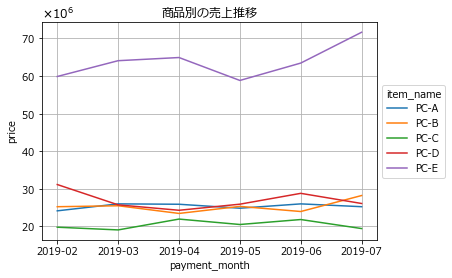

In [22]:
# グラフ作成
for col in graph_data:
    graph_data[col].plot(label=col)

plt.title("商品別の売上推移")
plt.ylabel("price")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="item_name")
plt.gca().yaxis.set_major_formatter(FixedOrderFormatter(order_of_mag=6, useMathText=True))
plt.gca().ticklabel_format(style="sci",  axis="y", scilimits=(0, 0))
plt.gca().yaxis.offsetText.set_fontsize(12)
plt.grid()
plt.show()

[<div style="text-align: right;">トップに戻る</div>](#top)